# AI Model for color detection

### Test

In [2]:
print("Hello World")

Hello World


### Import packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fetch datasets

In [4]:
df = pd.read_csv('./ColorData.csv')
df.head()

,Red,Green,Blue,Output
0,1.000000,1.000000,1.000000,1
1,0.594458,0.119402,0.806779,0
2,0.422986,0.106361,0.574184,0
3,0.662328,0.501345,0.141405,1
4,0.371034,0.417072,0.959620,0


### General stats of the datasets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Red     1001 non-null   float64
 1   Green   1001 non-null   float64
 2   Blue    1001 non-null   float64
 3   Output  1001 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [6]:
df.describe()

,Red,Green,Blue,Output
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.495161,0.503341,0.498369,0.501499
std,0.288021,0.280028,0.289668,0.500248
min,0.000393,0.002705,0.000965,0.000000
25%,0.248556,0.268059,0.246721,0.000000
50%,0.485663,0.501249,0.504383,1.000000
75%,0.741773,0.744281,0.749486,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [27]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (1001, 4)


In [28]:
df.groupby('Output').size()

Output
0    499
1    502
dtype: int64

### Graphical representation of datasets

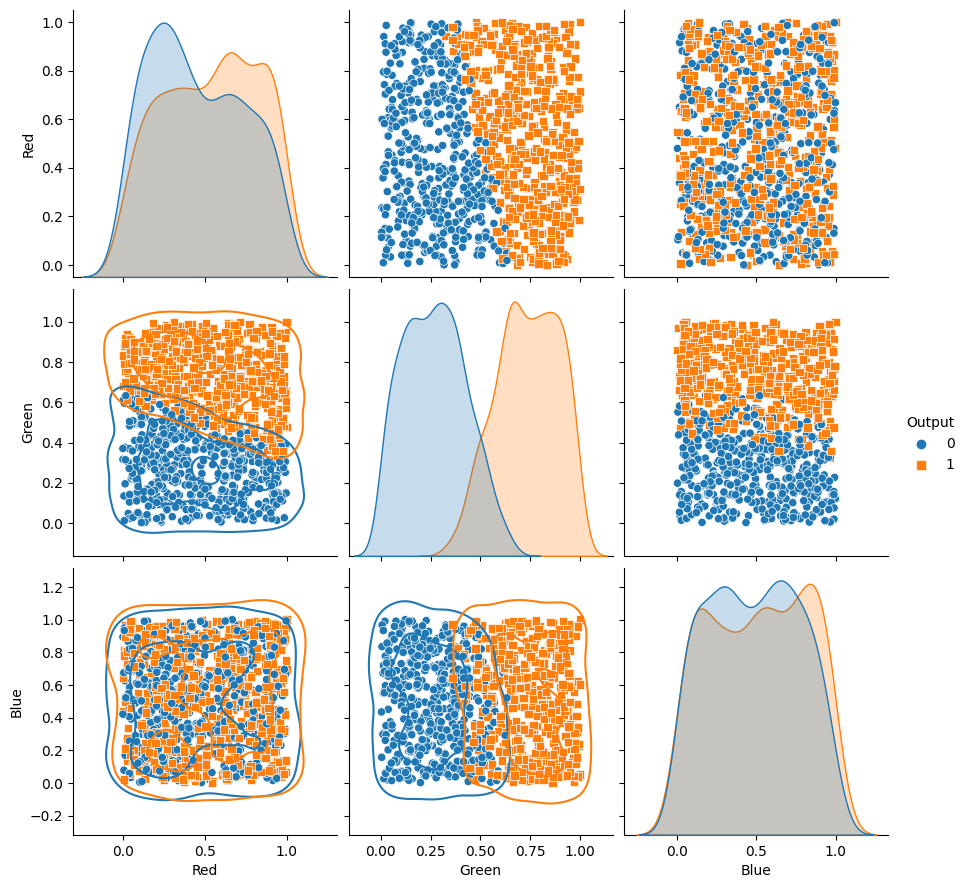

In [36]:
g = sns.pairplot(df, hue = 'Output', height=3, diag_kind="kde", markers=["o", "s"])
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

### Splitting datasets

In [10]:
# import train_test_split
from sklearn.model_selection import train_test_split

X = df.drop(['Output'],axis=1).values   # independent features
y = df['Output'].values					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train

array([[0.26363693, 0.08974957, 0.61720735],
       [0.14795295, 0.17205107, 0.87059704],
       [0.5271989 , 0.13665693, 0.65542369],
       ...,
       [0.62684769, 0.63733256, 0.73184898],
       [0.48129529, 0.66627309, 0.50606451],
       [0.20416537, 0.28909109, 0.18424167]])

## Random Forest Classifier

In [12]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

In [13]:
# Training model
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
# Testing model
y_pred = RFC.predict(X_test)

              precision    recall  f1-score   support

       white       0.96      0.98      0.97       114
       black       0.99      0.96      0.97       137

    accuracy                           0.97       251
   macro avg       0.97      0.97      0.97       251
weighted avg       0.97      0.97      0.97       251



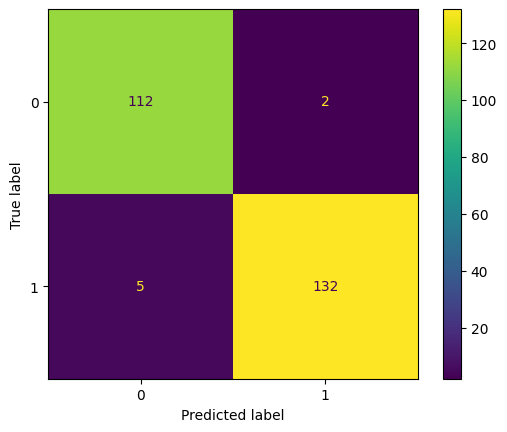

In [15]:
# Score model

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred, target_names=["white","black"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Generate tree.dot

In [16]:
from sklearn.tree import export_graphviz

estimator = RFC.estimators_[1]
tree_data = export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = ["Red","Blue","Green"],
                rounded = True, proportion = False, 
                precision = 1, filled = True)

Show tree image

There two options
- Convert dot to png by using [onlineconvertfree](https://onlineconvertfree.com/convert-format/dot-to-png/) OR
- Insert this commands
    ```
    !dot -Tpng tree.dot -o tree.png
    %matplotlib inline
    ```

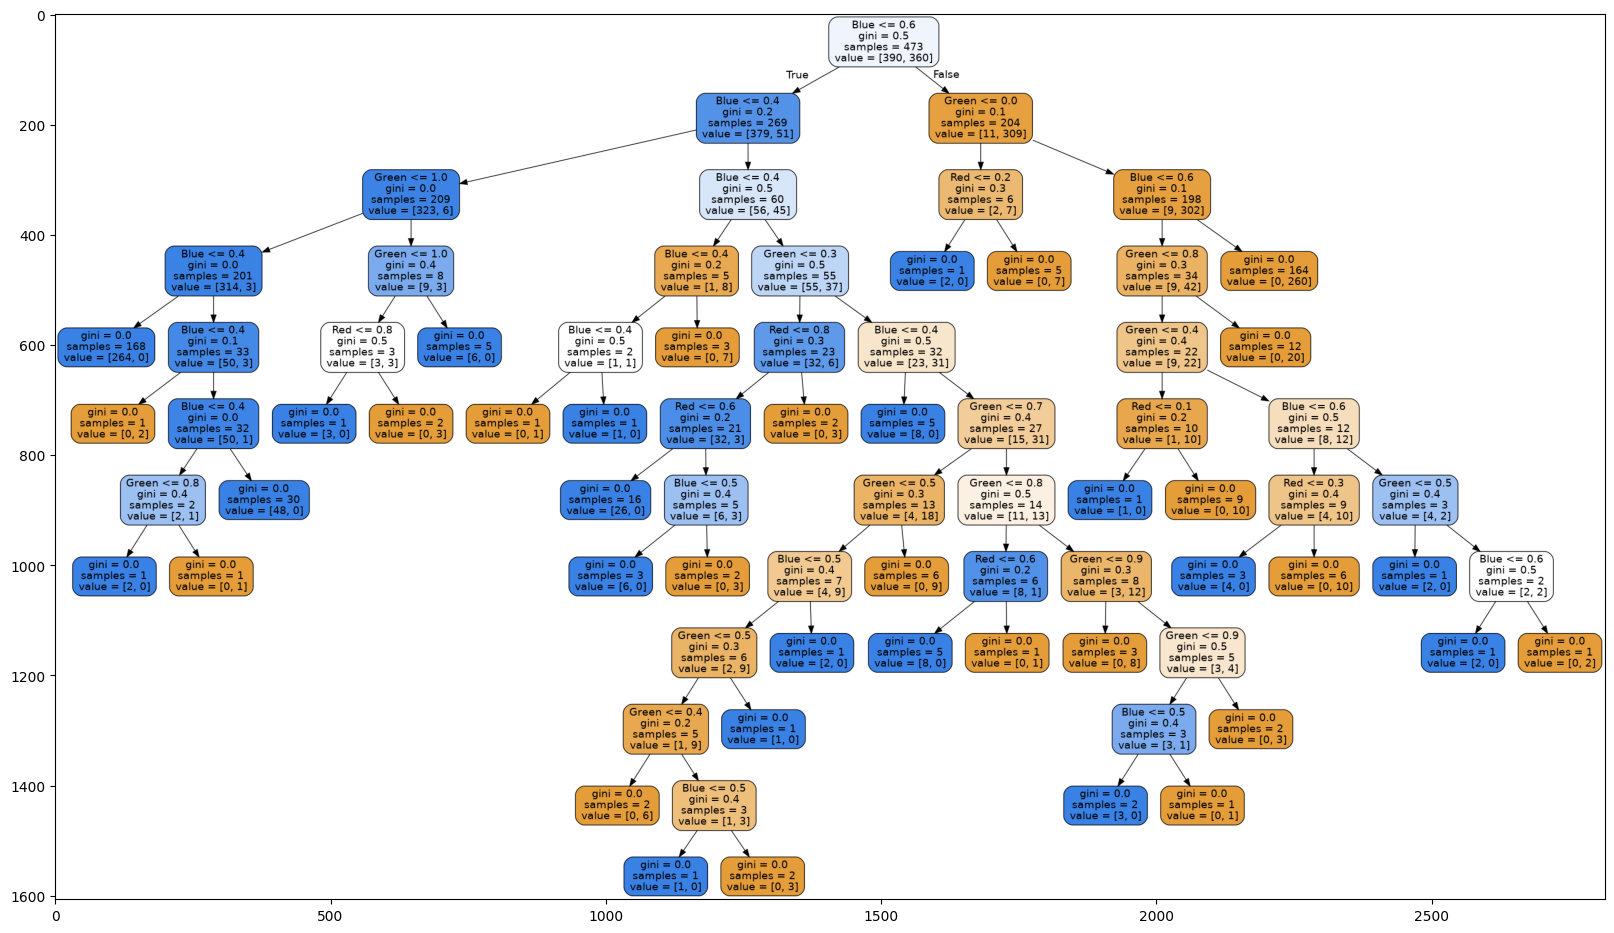

In [17]:
import cv2

img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)


### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

In [38]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred = KNN.predict(X_test)

              precision    recall  f1-score   support

       white       0.93      0.98      0.96       114
       black       0.98      0.94      0.96       137

    accuracy                           0.96       251
   macro avg       0.96      0.96      0.96       251
weighted avg       0.96      0.96      0.96       251



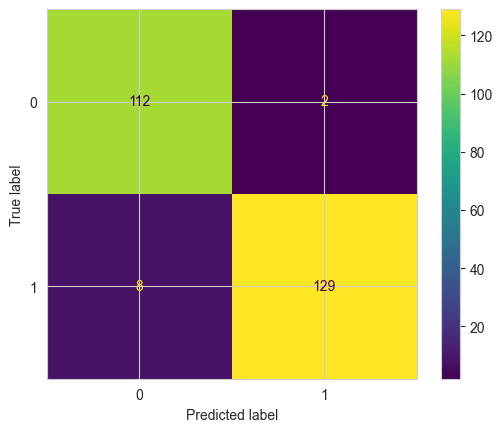

In [55]:
print(classification_report(y_test, y_pred, target_names=["white","black"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Using cross-validation for parameter tuning:

In [42]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

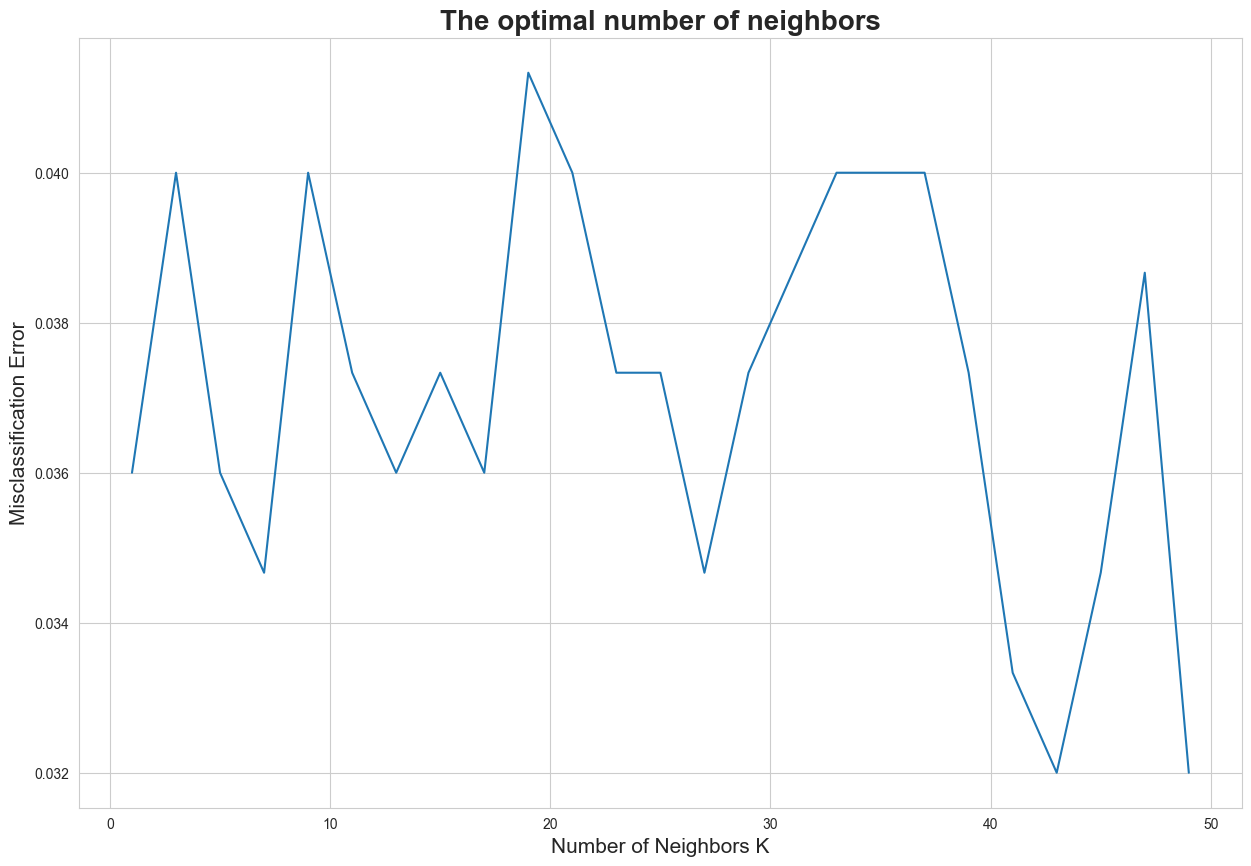

In [53]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [47]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {best_k}")

The optimal number of neighbors is 43


In [48]:
KNN = KNeighborsClassifier(n_neighbors=43)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [49]:
y_pred = KNN.predict(X_test)

              precision    recall  f1-score   support

       white       0.93      0.98      0.96       114
       black       0.98      0.94      0.96       137

    accuracy                           0.96       251
   macro avg       0.96      0.96      0.96       251
weighted avg       0.96      0.96      0.96       251



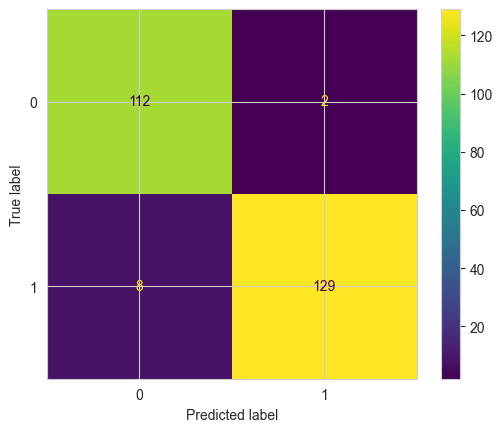

In [54]:
print(classification_report(y_test, y_pred, target_names=["white","black"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## GaussianNB

In [94]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [95]:
GNB.fit(X_train, y_train)

GaussianNB()

In [96]:
y_pred = GNB.predict(X_test)

              precision    recall  f1-score   support

       white       0.90      0.96      0.93       114
       black       0.96      0.91      0.94       137

    accuracy                           0.93       251
   macro avg       0.93      0.93      0.93       251
weighted avg       0.93      0.93      0.93       251



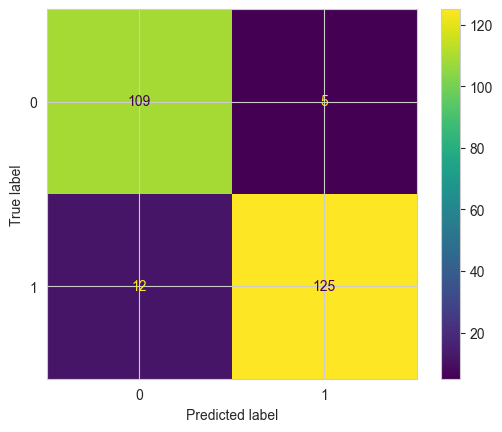

In [97]:
print(classification_report(y_test, y_pred, target_names=["white","black"]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()